You are provided with a csv file (magic_gamma_telescope04.csv) dataset which contains telescopic experiment data. Using the features given in it, you need to classify the outcome "class".<br> • Prepare a model which can classify it with f1 score = 70% and accuracy = 75%.<br> • Use neural networks combined with any HP parameter tuning.<br> • You can make use of any preprocessing activities if needed.<br> • No external data shall be added for increasing evaluation metric values.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
#storing the dataset to a dataframe named 'data'
data=pd.read_csv('/content/magic_gamma_telescope04_sample.csv')

In [3]:
#displaying the first few rows
data.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
data.shape

(4287, 11)

There are 4287 observations and 11 features in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   4287 non-null   float64
 1   fwidth    4287 non-null   float64
 2   fsize     4287 non-null   float64
 3   fconc     4287 non-null   float64
 4   fconc1    4287 non-null   float64
 5   fsym      4287 non-null   float64
 6   fm3long   4287 non-null   float64
 7   fm3trans  4287 non-null   float64
 8   falpha    4287 non-null   float64
 9   dist      4287 non-null   float64
 10  class     4287 non-null   object 
dtypes: float64(10), object(1)
memory usage: 368.5+ KB


In [6]:
#to check for null values
data.isna().sum()

flength     0
fwidth      0
fsize       0
fconc       0
fconc1      0
fsym        0
fm3long     0
fm3trans    0
falpha      0
dist        0
class       0
dtype: int64

There are no null values in the dataframe.

In [7]:
#descriptive statistics
data.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,57.716420,24.135054,2.849275,0.375352,0.212399,-8.742164,7.314128,0.642312,31.757071,195.702966
std,47.897591,21.823325,0.472802,0.181586,0.110284,66.928938,56.577545,24.176600,27.188376,76.210147
min,7.360600,0.000000,1.991600,0.013100,0.000300,-382.594000,-318.300200,-205.894700,0.000000,5.745600
25%,24.587650,11.904000,2.501100,0.232650,0.126450,-25.685900,-15.003250,-10.895600,7.439800,142.827500
50%,38.875400,17.389500,2.757400,0.352600,0.196000,1.845800,14.907700,1.910700,23.821000,193.740000
75%,75.201750,26.154050,3.131400,0.503000,0.285400,23.421500,34.763650,11.382700,53.004700,242.893700
max,334.177000,256.382000,5.323300,0.893000,0.628300,575.240700,238.321000,179.851000,90.000000,450.953000


In [8]:
data['class'].value_counts()

g    2183
h    2104
Name: class, dtype: int64

1. Preprocessing

1.1 Feature Reduction

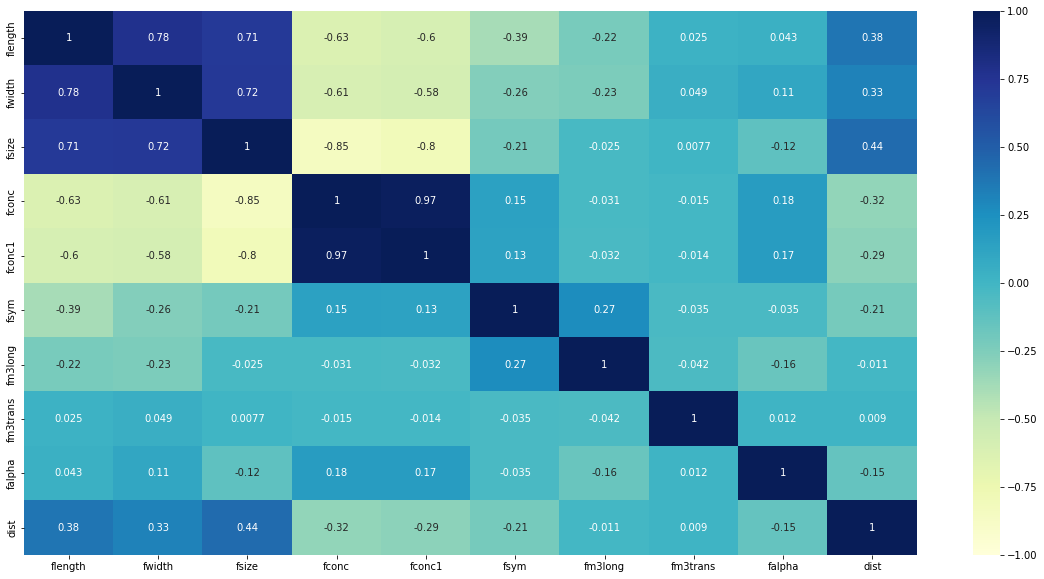

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,vmax=1,vmin=-1)
plt.show()

The features 'fsize' and 'fconc' have high negative correlation. <br>The features 'fconc' and 'fconc1' have high negative correlation. <br>So, dropping these features from the model.

In [10]:
data.drop(['fsize','fconc1'],axis=1,inplace=True)

1.2 Feature Scaling

In [11]:
#dependent variable is stored in y
y=data['class'].map({'g':0,'h':1})
#independent variable is stored in x
x=data.drop(['class'],axis=1) 
x.describe()

,flength,fwidth,fconc,fsym,fm3long,fm3trans,falpha,dist
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,57.716420,24.135054,0.375352,-8.742164,7.314128,0.642312,31.757071,195.702966
std,47.897591,21.823325,0.181586,66.928938,56.577545,24.176600,27.188376,76.210147
min,7.360600,0.000000,0.013100,-382.594000,-318.300200,-205.894700,0.000000,5.745600
25%,24.587650,11.904000,0.232650,-25.685900,-15.003250,-10.895600,7.439800,142.827500
50%,38.875400,17.389500,0.352600,1.845800,14.907700,1.910700,23.821000,193.740000
75%,75.201750,26.154050,0.503000,23.421500,34.763650,11.382700,53.004700,242.893700
max,334.177000,256.382000,0.893000,575.240700,238.321000,179.851000,90.000000,450.953000


In [12]:
#min max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler()
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,0.154080,0.094137,0.411697,0.390309,0.584984,0.535423,0.352856,0.426672
std,0.146558,0.085120,0.206371,0.069875,0.101645,0.062675,0.302093,0.171179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052712,0.046431,0.249517,0.372620,0.544889,0.505512,0.082664,0.307906
50%,0.096430,0.067827,0.385839,0.401363,0.598626,0.538711,0.264678,0.422263
75%,0.207582,0.102012,0.556768,0.423889,0.634298,0.563266,0.588941,0.532669
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

2. Modelling

In [14]:
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense,Dropout

In [15]:
model1=models.Sequential()
model1.add(Dense(8,input_shape=(8,),activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [16]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
model1.fit(x_train,y_train,epochs=5,batch_size=16)

Epoch 1/5
215/215 [==============================] - 2s 3ms/step - loss: 0.5355 - accuracy: 0.7474 - precision: 0.7934 - recall: 0.6661
Epoch 2/5
215/215 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.7719 - precision: 0.8033 - recall: 0.7176
Epoch 3/5
215/215 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7737 - precision: 0.7974 - recall: 0.7311
Epoch 4/5
215/215 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7722 - precision: 0.7905 - recall: 0.7381
Epoch 5/5
215/215 [==============================] - 1s 3ms/step - loss: 0.4544 - accuracy: 0.7699 - precision: 0.7812 - recall: 0.7469


In [17]:
loss,accuracy,precision,recall=model1.evaluate(x_test,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7879 - precision: 0.7822 - recall: 0.7506


In [18]:
f1_score=(2*precision*recall)/(precision+recall)
f1_score

0.7660668403005358

3. Hyperparameter Tuning

In [44]:
def tune_nn_model( num_hidden_units_1, num_hidden_units_2, batch_size):
  model1=models.Sequential()
  model1.add(Dense(8,input_shape=(8,),activation='relu'))
  model1.add(Dense(num_hidden_units_1,activation='relu'))
  model1.add(Dense(num_hidden_units_2,activation='relu'))
  model1.add(Dense(32,activation='relu'))
  model1.add(Dense(1,activation='sigmoid'))
  model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
  model1.fit(x_train,y_train,epochs=5,batch_size=batch_size)
  loss,accuracy,precision,recall=model1.evaluate(x_test,y_test)
  f1_score=(2*precision*recall)/(precision+recall)
  return accuracy,f1_score

In [45]:
# define search space
space={"num_hidden_units_1":[16,32], "num_hidden_units_2":[16,32], "batch_size":[2,3]}

In [46]:
accuracy_dict={}
i=1
for m in space['num_hidden_units_1']:
    for n in space['num_hidden_units_2']:
        for o in space['batch_size']:
            accuracy,f1_score=tune_nn_model(num_hidden_units_1=m, num_hidden_units_2=n,batch_size=o)
            accuracy_dict[i]=[m,m,o,accuracy,f1_score]
            i=i+1


Epoch 1/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.5145 - accuracy: 0.7492 - precision: 0.7522 - recall: 0.7399
Epoch 2/5
1715/1715 [==============================] - 4s 3ms/step - loss: 0.4528 - accuracy: 0.7766 - precision: 0.7789 - recall: 0.7698
Epoch 3/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.4448 - accuracy: 0.7731 - precision: 0.7866 - recall: 0.7469
Epoch 4/5
1715/1715 [==============================] - 5s 3ms/step - loss: 0.4405 - accuracy: 0.7772 - precision: 0.7964 - recall: 0.7422
Epoch 5/5
27/27 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7821 - precision: 0.7793 - recall: 0.7380
Epoch 1/5
1143/1143 [==============================] - 4s 2ms/step - loss: 0.5637 - accuracy: 0.7049 - precision: 0.6938 - recall: 0.7288
Epoch 2/5
1143/1143 [==============================] - 3s 2ms/step - loss: 0.4922 - accuracy: 0.7556 - precision: 0.7827 - recall: 0.7047
Epoch 3/5
1143/1143 [=================

In [47]:
accuracy_dict

{1: [16, 16, 2, 0.7820512652397156, 0.758085385526122],
 2: [16, 16, 3, 0.7692307829856873, 0.7018072342716116],
 3: [16, 16, 2, 0.7937062978744507, 0.7817509180188478],
 4: [16, 16, 3, 0.7878788113594055, 0.7753086498906165],
 5: [32, 32, 2, 0.7703962922096252, 0.7576875918158641],
 6: [32, 32, 3, 0.7808857560157776, 0.7486630921585807],
 7: [32, 32, 2, 0.7773892879486084, 0.7350901483668245],
 8: [32, 32, 3, 0.8006992936134338, 0.767346935493986]}

The metrics have improved for the last run after hyperparameter tuning. It gives an accuracy of 80% and F1 Score of 77%.